Μ162 - Τεχνικές Ιδιωτικότητας

Διδάσκων: Καθ. Χατζηκοκολάκης Κωνσταντίνος

Μαρία Ελένη (ic1200005)

ΠΜΣ	Τεχνολογίες της Πληροφορικής και Επικοινωνιών

# Dining Cryptographers

#1.Εισαγωγή

Στην κρυπτογραφία, το πρόβλημα του πρωτοκόλλου Dining Cryptographers μελετά τον τρόπο εκτέλεσης ενός ασφαλούς πολυμερούς υπολογισμού της συνάρτησης XOR. Στις αρχές του 1980 ο David Chaum πρότεινε για πρώτη φορά αυτό το πρόβλημα χρησιμοποιώντας το για να αποδείξει ότι ήταν δυνατό να σταλούν ανώνυμα μηνύματα χωρίς να αποκαλυφθεί η ταυτότητα αποστολέα και παραλήπτη. Στην παρούσα έρευνα γίνεται προσπάθεια ανάλυσης του μοντέλου ανώνυμης επικοινωνίας Dining Cryptographers μέσω της θεωρίας του Quantitative Information Flow.

#2.Κατασκευή Καναλιού
Έστω ένα σύστημα με m χρήστες οι οποίοι συνδέονται μεταξύ τους. Κατασκευάζουμε έναν γράφο με m κόμβους οι οποίος συνδέονται μεταξύ τους δημιουργώντας διάφορους συνδυασμούς. Για να προκύψουν οι συνδυασμοί ο κάθε χρήστης ρίχνει ένα νόμισμα το οποίο θα φέρει κορόνα (1) είτε γράμματα (0).  Αθροίζοντας τα νομίσματα του κάθε χρήστη σύμφωνα με τη συνάρτηση XOR  προκύπτουν οι εξής συνδυασμοί: 



*   1+1=0
*   1+0=1
*   0+0=0
*   0+1=1



Όποτε ο κάθε χρήστης ανακοινώνει του αποτέλεσμα του αθροίσματος το οποίο θα είναι 1 ή 0. 

Για να υπολογίσουμε τις πιθανές εξόδους δημιουργούμε ένα κανάλι C με 13 χρήστες μη κυκλικό και μη πλήρη με πίνακα γειτνίασης Α όπου ο αντίπαλος είναι ο Bayes στις περιπτώσεις που έχουμε κάποιο corrupted χρήστη. 

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
try:
    from qif import *
except: # install qif if not available (for running in colab, etc)
    import IPython; IPython.get_ipython().run_line_magic('pip', 'install qif')
    from qif import *

     |████████████████████████████████| 20.9 MB 1.4 MB/s 


In [3]:
def show_graph_with_labels(adjacency_matrix): 
    rows, cols = np.where(adjacency_matrix != -1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=300, node_color = 'red', with_labels=True)
    plt.show()

def get_pi(p, A):
    pi = [p] * len(A)
    pi = numpy.array(pi)
    pi[0] = p
    pi[1:] = (1-p)/(len(A) - 1)
    return pi

def factor(A,B):
    R = channel.factorize(B, A)
    A_round = np.round(A.dot(R),2)
    B_round = np.round(B,2)
    print("Is CR == C_new? ", np.all(A_round == B_round))
    

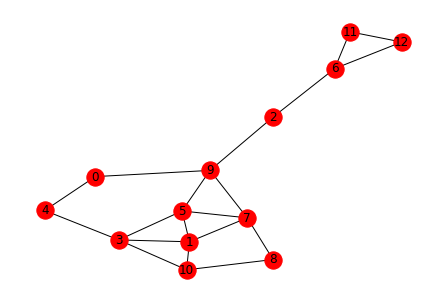

In [4]:
pi = probab.uniform(13)

A = np.array([[-1,-1,-1,-1,0.5,-1,-1,-1,-1,0.5,-1,-1,-1],[-1,-1,-1,0.5,-1,0.5,-1,0.5,-1,-1,0.5,-1,-1],[-1,-1,-1,-1,-1,-1,0.5,-1,-1,0.5,-1,-1,-1],[-1,0.5,-1,-1,0.5,0.5,-1,-1,-1,-1,0.5,-1,-1],[0.5,-1,-1,0.5,-1,-1,-1,-1,-1,-1,-1,-1,-1],[-1,0.5,-1,0.5,-1,-1,-1,0.5,-1,0.5,-1,-1,-1],[-1,-1,0.5,-1,-1,-1,-1,-1,-1,-1,-1,0.5,0.5],[-1,0.5,-1,-1,-1,0.5,-1,-1,0.5,0.5,-1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,0.5,-1,-1,0.5,-1,-1],[0.5,-1,0.5,-1,-1,0.5,-1,0.5,-1,-1,-1,-1,-1],[-1,0.5,-1,0.5,-1,-1,-1,-1,0.5,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,0.5,-1,-1,-1,-1,-1,0.5],[-1,-1,-1,-1,-1,-1,0.5,-1,-1,-1,-1,0.5,-1]])
show_graph_with_labels(A)

#3.Ανάλυση του συστήματος

#3.1 Δίκαια νομίσματα
Αν υποθέσουμε πως όλα τα νομίσματα είναι δίκαια θα πρέπει να μελετήσουμε σε ποιες περιπτώσεις υπάρχει ισχυρή ανωνυμία με ή χωρίς corrupted χρήστες. 

Για αρχή παίρνουμε ένα απλό σύστημα χωρίς κανένα corrupted χρήστη να παρεμβάλλεται μέσω σ’αυτό. Από τα αποτελέσματα προκύπτει πως υπάρχει ισχυρή ανωνυμία καθώς η πολλαπλασιαστική του διαρροή ισούται με 1 άρα συμπεράνουμε πως από το σύστημα δεν διέρρευσε καμία πληροφορία. Επίσης όσον αφορά και την πολλαπλασιαστική του χωρητικότητα βλέπουμε πως και εκείνη ισούται με 1 γεγονός που επιβεβαιώνει την αρχική μας σκέψη και τέλος συγκρίνοντας Prior Bayes vulnerability και το Posterior Bayes vulnerability βλέπουμε πως δεν υπάρχει καμία απολύτως διαφορά. 


In [5]:
A1_ch = np.array([[0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625]])
print("Prior Bayes vulnerability =", measure.bayes_vuln.prior(pi))
print("Posterior Bayes vulnerability =", measure.bayes_vuln.posterior(pi,A1_ch))
print("Multiplicative Bayes leakage =", measure.bayes_vuln.mult_leakage(pi,A1_ch))
print("Multiplicative Bayes capacity =", measure.bayes_vuln.mult_capacity(A1_ch))

Prior Bayes vulnerability = 0.07692307692307693
Posterior Bayes vulnerability = 0.07692307692307693
Multiplicative Bayes leakage = 1.0
Multiplicative Bayes capacity = 1.0


Σαν δεύτερη περίπτωση μελέτης υποθέτουμε πως στο σύστημα υπάρχει ένας corrupted χρήστης ενώ όλοι οι υπόλοιποι είναι τίμιοι. Σε αυτήν την περίπτωση όπως παρατηρούμε παρακάτω η διαρροή ισούται με 2, πράγμα που αποδεικνύει πως το σύστημα είναι πιο ευάλωτο παρόλα αυτά και σε αυτή την περίπτωση υπάρχει ισχυρή ανωνυμία.

In [ ]:
A2_ch = np.array([[0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125]])
print("Prior Bayes vulnerability =", measure.bayes_vuln.prior(pi))
print("Posterior Bayes vulnerability =", measure.bayes_vuln.posterior(pi,A2_ch))
print("Multiplicative Bayes leakage =", measure.bayes_vuln.mult_leakage(pi,A2_ch))

Prior Bayes vulnerability = 0.07692307692307693
Posterior Bayes vulnerability = 0.15384615384615385
Multiplicative Bayes leakage = 2.0


## 3.2 Μη-δίκαια νομίσματα 

θεωρώντας ότι η κατανομή κάθε νομίσματος είναι ομοιόμορφη και εφόσον δεν είναι όλα τα νομίσματα ίδια, είναι δυνατόν να έχουμε ισχυρή ανωνυμία χωρίς όλα τα νομίσματα να είναι δίκαια. Παρακάτω αποδεικνύεται η παραπάνω παραδοχή μέσω ενός παραδείγματος κατασκευής ενός νέου γράφου.

Αρχικά, θα κατασκευαστεί ένας γράφος με 6 κόμβους, 5 ακμές και όλα τα νομίσματα δίκαια. Αυτός θα αποτελεί το spanning tree του επόμενου γράφου (Β1). Έπειτα, στο ήδη υπάρχων γράφο θα γίνει προσθήκη ακμών στο spanning tree. Τα νομίσματα των νέων ακμών θα είναι μη δίκαια με τυχαία πιθανότητα (Β2). Τέλος, θα γίνει προσπάθεια απεικόνισης ενός νεόυ καναλιού που θα προκύψει απο την αντικατάσταση ενός τίμιου χρήστη με αριθμό 1 με έναν άλλο αυτη την φορά corrupted χρήστη (Β3). 
Και για τις τρεις αυτές περιπτώσεις θα θεωρήσουμε ότι η αρχική κατανομή είναι η ομοιόμορφη και αντίπαλος είναι ο Bayes. 

**Γράφος B1** 

Παρατηρώντας τα αποτελέσματα του γράφου Β1 βλέπουμε πως δεν έχουμε διαρροή πληροφορίας από το σύστημα  καθώς το Multiplicative Bayes leakage και το Multiplicative Bayes capacity ισούται με 1 και το Prior Bayes vulnerability και το Posterior Bayes vulnerability φέρουν την ίδια τιμή.


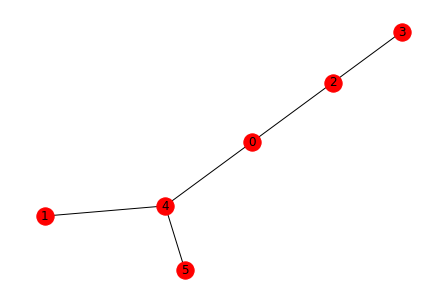

Prior Bayes vulnerability = 0.16666666666666666
Posterior Bayes vulnerability = 0.16666666666666666
Multiplicative Bayes leakage = 1.0
Multiplicative Bayes capacity = 1.0


In [6]:
B_1 = np.array([[-1,-1,0.5,-1,0.5,-1],[-1,-1,-1,-1,0.5,-1],[0.5,-1,-1,0.5,-1,-1],[-1,-1,0.5,-1,-1,-1],[0.5,0.5,-1,-1,-1,0.5],[-1,-1,-1,-1,0.5,-1]])
show_graph_with_labels(B_1)
B_1_ch = np.array([[0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125]])
pi = probab.uniform(6)
print("Prior Bayes vulnerability =", measure.bayes_vuln.prior(pi))
print("Posterior Bayes vulnerability =", measure.bayes_vuln.posterior(pi,B_1_ch))
print("Multiplicative Bayes leakage =", measure.bayes_vuln.mult_leakage(pi,B_1_ch))
print("Multiplicative Bayes capacity =", measure.bayes_vuln.mult_capacity(B_1_ch))

**Γράφος Β2** 

Ο γράφος που εξετάζουμε, στην περίπτωση αυτή, προκύπτει από την προσθήκη τριών ακμών με νομίσματα μη δίκαια. Οι πιθανότητες να έρθει κορώνα στα τρία αυτά νομίσματα είναι 0.9, 0.4 και 0.3. Εξετάζοντας τις ίδιες μετρικές με πριν, παρατηρούμε ότι, πράγματι, η ανωνυμία παραμένει ισχυρή.

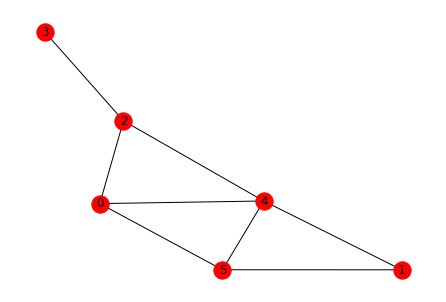

Prior Bayes vulnerability = 0.16666666666666666
Posterior Bayes vulnerability = 0.16666666666666666
Multiplicative Bayes leakage = 1.0
Multiplicative Bayes capacity = 1.0


In [9]:
B_2 = np.array([[-1,-1,0.5,-1,0.5,0.9],[-1,-1,-1,-1,0.4,0.5],[0.5,-1,-1,0.5,0.3,-1],[-1,-1,0.5,-1,-1,-1],[0.5,0.4,0.3,-1,-1,0.5],[0.9,0.5,-1,-1,0.5,-1]])
show_graph_with_labels(B_2)
B_2_ch = np.array([[0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125]])
print("Prior Bayes vulnerability =", measure.bayes_vuln.prior(pi))
print("Posterior Bayes vulnerability =", measure.bayes_vuln.posterior(pi,B_2_ch))
print("Multiplicative Bayes leakage =", measure.bayes_vuln.mult_leakage(pi,B_2_ch))
print("Multiplicative Bayes capacity =", measure.bayes_vuln.mult_capacity(B_2_ch))

**Κανάλι B3** 

Στην περίπτωση αυτή, αντικαθιστούμε τον χρήστη με αριθμό 1 με έναν corrupted. Η διαρροή αλλάζει και η γνώση του αντιπάλου διπλασιάζεται σε σχέση με την αρχική του γνώση. Παρ' όλα αυτά, η ανωνυμία παραμένει ισχυρή μέσα στη συνιστώσα ακόμα και αν υπάρχουν δύο μη τίμια νομίσματα.


In [10]:
B_3_ch = np.array([[0.012499999999999999, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.0, 0.0, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.01875, 0.0, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.012499999999999999, 0.01875, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.0], [0.0, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.012499999999999999, 0.01875, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.0, 0.012499999999999999, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.0, 0.0, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.01875], [0.012499999999999999, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.0, 0.0, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.01875, 0.0, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.012499999999999999, 0.01875, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.0], [0.012499999999999999, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.0, 0.0, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.01875, 0.0, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.012499999999999999, 0.01875, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.0], [0.012499999999999999, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.0, 0.0, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.01875, 0.0, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.012499999999999999, 0.01875, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.0], [0.012499999999999999, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.0, 0.0, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.01875, 0.0, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.012499999999999999, 0.01875, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.0]])
print("Prior Bayes vulnerability =", measure.bayes_vuln.prior(pi))
print("Posterior Bayes vulnerability =", measure.bayes_vuln.posterior(pi,B_3_ch))
print("Multiplicative Bayes leakage =", measure.bayes_vuln.mult_leakage(pi,B_3_ch))

Prior Bayes vulnerability = 0.16666666666666666
Posterior Bayes vulnerability = 0.3333333333333333
Multiplicative Bayes leakage = 2.0


## 3.3 Μηδενική διαρροή 

Είναι δυνατόν κάποιο instance του συστήματος να έχει μηδενική διαρροή χωρίς να είναι ισχυρά ανώνυμο; 




Για να απαντήσουμε στο παραπάνω ερώτημα θα πρέπει πρώτα να υπολογίσουμε την διαρροή για συνδυασμούς  νομισμάτων, corrupted χρηστών και prior κατανομών. 
 

* C1: 2 corrupted χρήστες, δίκαια νομίσματα
* C2: 0 corrupted χρήστες, μη δίκαια νομίσματα όλα ίδια 
* C3: 2 corrupted χρήστες, μη δίκαια νομίσματα όλα ίδια
* C4: 0 corrupted χρήστες, μη δίκαια νομίσματα όχι ίδια
* C5: 2 corrupted χρήστες, μη δίκαια νομίσματα όχι ίδια

Και για τις πέντε περιπτώσεις θα πάρουμε τον ίδιο τυχαίο γράφο μη κυκλικό και μη πλήρη με επτά χρήστες.

Για κάθε μία από τις πέντε περιπτώσεις που εξετάζονται, κατασκευάζεται το αντίστοιχο κανάλι. Στη συνέχεια, δημιουργείται ένα γράφημα που δείχνει την πολλαπλασιαστική Bayes διαρροή για διαφορετικές prior γνώσεις, για κάθε μία από τις πέντες αυτές περιπτώσεις. Υποθέτουμε ότι ο χρήστης 0 έχει πιθανότητα p να στείλει το μήνυμα και οι υπόλοιποι χρήστες μοιράζονται το υπόλοιπο 1 − p. Επιπλέον, σχεδιάζεται το αντίστοιχο γράφημα για το g-leakage, για έναν αντίπαλο με συνάρτηση κέρδους g η οποία παράγεται με τυχαίο τρόπο.


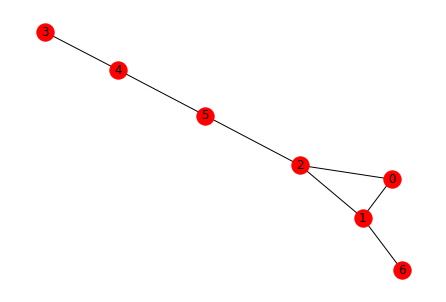

In [11]:
C_unbiased = np.array([[-1,0.5,0.5,-1,-1,-1,-1], [0.5,-1,0.5,-1,-1,-1,0.5],[0.5,0.5,-1,-1,-1,0.5,-1],[-1,-1,-1,-1,0.5,-1,-1],[-1,-1,-1,0.5,-1,0.5,-1],[-1,-1,0.5,-1,0.5,-1,-1],[-1,0.5,-1,-1,-1,-1,-1]])
C_same_biased = np.array([[-1,0.7,0.7,-1,-1,-1,-1],[0.7,-1,0.7,-1,-1,-1,0.7],[0.7,0.7,-1,-1,-1,0.7,-1],[-1,-1,-1,-1,0.7,-1,-1],[-1,-1,-1,0.7,-1,0.7,-1],[-1,-1,0.7,-1,0.7,-1,-1],[-1,0.7,-1,-1,-1,-1,-1]])
C_different_biased = np.array([[-1,0.4,0.3,-1,-1,-1,-1],[0.4,-1,0.6,-1,-1,-1,0.5],[0.3,0.6,-1,-1,-1,0.2,-1],[-1,-1,-1,-1,0.4,-1,-1],[-1,-1,-1,0.4,-1,0.8,-1],[-1,-1,0.2,-1,0.8,-1,-1],[-1,0.5,-1,-1,-1,-1,-1]])
show_graph_with_labels(C_unbiased)

In [8]:
C1_ch = np.array([[0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
C2_ch = np.array([[0.08883699999999997, 0.05042099999999999, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.038072999999999996, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.021609, 0.006993000000000001, 0.016316999999999998, 0.009261000000000002, 0.016316999999999998, 0.006993000000000001, 0.016317, 0.016316999999999998, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.006993000000000001], [0.05042099999999999, 0.08883699999999997, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.038072999999999996, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.021609, 0.006993000000000001, 0.016316999999999998, 0.009261000000000002, 0.016316999999999998, 0.006993000000000001, 0.016317, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.016316999999999998, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.006993000000000001, 0.003969000000000002], [0.05042099999999999, 0.05042099999999999, 0.08883699999999997, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.021609, 0.006993000000000001, 0.016316999999999998, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.038072999999999996, 0.003969000000000002, 0.009261000000000002, 0.016316999999999998, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.016316999999999998, 0.006993000000000001, 0.016317, 0.006993000000000001, 0.003969000000000002, 0.003969000000000002], [0.003969000000000002, 0.003969000000000002, 0.006993000000000001, 0.08883699999999997, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.003969000000000002, 0.05042099999999999, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.05042099999999999, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.009261000000000002, 0.021609, 0.021609, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.05042099999999999, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.009261000000000002, 0.016316999999999998, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.016316999999999998, 0.009261000000000002, 0.003969000000000002, 0.038072999999999996, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.006993000000000001, 0.016316999999999998, 0.006993000000000001, 0.016317, 0.009261000000000002, 0.009261000000000002], [0.009261000000000002, 0.009261000000000002, 0.016317, 0.038072999999999996, 0.08883699999999997, 0.038072999999999996, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.021609, 0.003969000000000002, 0.021609, 0.05042099999999999, 0.021609, 0.003969000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.021609, 0.006993000000000001, 0.003969000000000002, 0.009261000000000002, 0.016316999999999998, 0.021609, 0.038072999999999996, 0.016317, 0.006993000000000001, 0.016316999999999998, 0.009261000000000002, 0.038072999999999996, 0.021609, 0.009261000000000002, 0.016317, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.009261000000000002, 0.009261000000000002, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.002997000000000001, 0.006993000000000001, 0.016316999999999998, 0.006993000000000001, 0.003969000000000002, 0.003969000000000002], [0.021609, 0.021609, 0.038072999999999996, 0.016317, 0.038072999999999996, 0.08883699999999997, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.016316999999999998, 0.009261000000000002, 0.003969000000000002, 0.006993000000000001, 0.009261000000000002, 0.016317, 0.038072999999999996, 0.016316999999999998, 0.006993000000000001, 0.003969000000000002, 0.016317, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.003969000000000002, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.003969000000000002, 0.0017010000000000011, 0.003969000000000002, 0.021609, 0.003969000000000002, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.006993000000000001, 0.002997000000000001, 0.006993000000000001, 0.016316999999999998, 0.009261000000000002, 0.009261000000000002], [0.021609, 0.038072999999999996, 0.021609, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.08883699999999997, 0.021609, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.05042099999999999, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.05042099999999999, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.002997000000000001, 0.006993000000000001, 0.016316999999999998, 0.05042099999999999, 0.016316999999999998, 0.006993000000000001, 0.003969000000000002, 0.016317, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.003969000000000002, 0.006993000000000001, 0.009261000000000002, 0.016317, 0.038072999999999996, 0.003969000000000002, 0.038072999999999996, 0.016317, 0.038072999999999996, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.003969000000000002, 0.021609, 0.009261000000000002, 0.021609, 0.003969000000000002, 0.021609, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.006993000000000001, 0.021609, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.016316999999999998, 0.009261000000000002]])
C3_ch = np.array([[0.08235429999999996, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.08235429999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.03529469999999999, 0.0, 0.08235429999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.08235429999999996, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.03529469999999999, 0.08235429999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.08235429999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0027783000000000013, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0005103000000000004, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08235429999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
C4_ch = np.array([[0.007680000000000001, 0.007040000000000001, 0.007680000000000001, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.007040000000000001, 0.009600000000000001, 0.014399999999999996, 0.009599999999999997, 0.038400000000000004, 0.007680000000000001, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.009600000000000001, 0.01152, 0.0028799999999999993, 0.014399999999999996, 0.0019199999999999998, 0.009599999999999997, 0.038400000000000004, 0.010559999999999996, 0.0070399999999999985, 0.028160000000000004, 0.007680000000000001, 0.01056, 0.002639999999999999, 0.011519999999999997, 0.0017599999999999996, 0.007679999999999999, 0.030720000000000004, 0.01152, 0.0028799999999999993, 0.010559999999999996, 0.0019199999999999998, 0.0070399999999999985, 0.028160000000000004, 0.04608, 0.01056, 0.002639999999999999, 0.0017599999999999996, 0.0144, 0.003599999999999999, 0.011519999999999997, 0.0023999999999999994, 0.007679999999999999, 0.030720000000000004, 0.0576, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.04608, 0.0144, 0.003599999999999999, 0.0023999999999999994, 0.0576, 0.04224, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.04608, 0.04224, 0.04608], [0.007040000000000001, 0.007680000000000001, 0.009600000000000001, 0.014399999999999996, 0.009599999999999997, 0.038400000000000004, 0.007680000000000001, 0.007680000000000001, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.007040000000000001, 0.010559999999999996, 0.0070399999999999985, 0.028160000000000004, 0.007680000000000001, 0.01056, 0.002639999999999999, 0.011519999999999997, 0.0017599999999999996, 0.007679999999999999, 0.030720000000000004, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.009600000000000001, 0.01152, 0.0028799999999999993, 0.014399999999999996, 0.0019199999999999998, 0.009599999999999997, 0.038400000000000004, 0.0144, 0.003599999999999999, 0.011519999999999997, 0.0023999999999999994, 0.007679999999999999, 0.030720000000000004, 0.0576, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.01152, 0.0028799999999999993, 0.010559999999999996, 0.0019199999999999998, 0.0070399999999999985, 0.028160000000000004, 0.04608, 0.01056, 0.002639999999999999, 0.0017599999999999996, 0.04224, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.04608, 0.04608, 0.0144, 0.003599999999999999, 0.0023999999999999994, 0.0576, 0.04608, 0.04224], [0.007680000000000001, 0.009600000000000001, 0.007680000000000001, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.009600000000000001, 0.007040000000000001, 0.010559999999999996, 0.0070399999999999985, 0.028160000000000004, 0.007680000000000001, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.007040000000000001, 0.01152, 0.0028799999999999993, 0.010559999999999996, 0.0019199999999999998, 0.0070399999999999985, 0.028160000000000004, 0.014399999999999996, 0.009599999999999997, 0.038400000000000004, 0.007680000000000001, 0.0144, 0.003599999999999999, 0.011519999999999997, 0.0023999999999999994, 0.007679999999999999, 0.030720000000000004, 0.01152, 0.0028799999999999993, 0.014399999999999996, 0.0019199999999999998, 0.009599999999999997, 0.038400000000000004, 0.04608, 0.0144, 0.003599999999999999, 0.0023999999999999994, 0.01056, 0.002639999999999999, 0.011519999999999997, 0.0017599999999999996, 0.007679999999999999, 0.030720000000000004, 0.04224, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.04608, 0.01056, 0.002639999999999999, 0.0017599999999999996, 0.04224, 0.0576, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.04608, 0.0576, 0.04608], [0.011519999999999997, 0.014399999999999996, 0.011519999999999997, 0.007680000000000001, 0.01152, 0.0028799999999999993, 0.014399999999999996, 0.010559999999999996, 0.007040000000000001, 0.01056, 0.002639999999999999, 0.011519999999999997, 0.007680000000000001, 0.01152, 0.0028799999999999993, 0.010559999999999996, 0.007679999999999999, 0.030720000000000004, 0.007040000000000001, 0.04608, 0.01056, 0.002639999999999999, 0.009600000000000001, 0.0144, 0.003599999999999999, 0.011519999999999997, 0.009599999999999997, 0.038400000000000004, 0.007680000000000001, 0.0576, 0.01152, 0.0028799999999999993, 0.007679999999999999, 0.030720000000000004, 0.009600000000000001, 0.04608, 0.0144, 0.003599999999999999, 0.0019199999999999998, 0.009599999999999997, 0.038400000000000004, 0.0576, 0.0070399999999999985, 0.028160000000000004, 0.007680000000000001, 0.04224, 0.01152, 0.0028799999999999993, 0.0017599999999999996, 0.007679999999999999, 0.030720000000000004, 0.04608, 0.0019199999999999998, 0.0070399999999999985, 0.028160000000000004, 0.04224, 0.0017599999999999996, 0.0023999999999999994, 0.007679999999999999, 0.030720000000000004, 0.04608, 0.0019199999999999998, 0.0023999999999999994, 0.0019199999999999998], [0.007679999999999999, 0.009599999999999997, 0.007679999999999999, 0.01152, 0.007680000000000001, 0.0019199999999999998, 0.009599999999999997, 0.0070399999999999985, 0.01056, 0.007040000000000001, 0.0017599999999999996, 0.007679999999999999, 0.01152, 0.007680000000000001, 0.0019199999999999998, 0.0070399999999999985, 0.011519999999999997, 0.04608, 0.01056, 0.030720000000000004, 0.007040000000000001, 0.0017599999999999996, 0.0144, 0.009600000000000001, 0.0023999999999999994, 0.007679999999999999, 0.014399999999999996, 0.0576, 0.01152, 0.038400000000000004, 0.007680000000000001, 0.0019199999999999998, 0.011519999999999997, 0.04608, 0.0144, 0.030720000000000004, 0.009600000000000001, 0.0023999999999999994, 0.0028799999999999993, 0.014399999999999996, 0.0576, 0.038400000000000004, 0.010559999999999996, 0.04224, 0.01152, 0.028160000000000004, 0.007680000000000001, 0.0019199999999999998, 0.002639999999999999, 0.011519999999999997, 0.04608, 0.030720000000000004, 0.0028799999999999993, 0.010559999999999996, 0.04224, 0.028160000000000004, 0.002639999999999999, 0.003599999999999999, 0.011519999999999997, 0.04608, 0.030720000000000004, 0.0028799999999999993, 0.003599999999999999, 0.0028799999999999993], [0.030720000000000004, 0.038400000000000004, 0.030720000000000004, 0.0028799999999999993, 0.0019199999999999998, 0.007680000000000001, 0.038400000000000004, 0.028160000000000004, 0.002639999999999999, 0.0017599999999999996, 0.007040000000000001, 0.030720000000000004, 0.0028799999999999993, 0.0019199999999999998, 0.007680000000000001, 0.028160000000000004, 0.04608, 0.011519999999999997, 0.002639999999999999, 0.007679999999999999, 0.0017599999999999996, 0.007040000000000001, 0.003599999999999999, 0.0023999999999999994, 0.009600000000000001, 0.030720000000000004, 0.0576, 0.014399999999999996, 0.0028799999999999993, 0.009599999999999997, 0.0019199999999999998, 0.007680000000000001, 0.04608, 0.011519999999999997, 0.003599999999999999, 0.007679999999999999, 0.0023999999999999994, 0.009600000000000001, 0.01152, 0.0576, 0.014399999999999996, 0.009599999999999997, 0.04224, 0.010559999999999996, 0.0028799999999999993, 0.0070399999999999985, 0.0019199999999999998, 0.007680000000000001, 0.01056, 0.04608, 0.011519999999999997, 0.007679999999999999, 0.01152, 0.04224, 0.010559999999999996, 0.0070399999999999985, 0.01056, 0.0144, 0.04608, 0.011519999999999997, 0.007679999999999999, 0.01152, 0.0144, 0.01152], [0.007040000000000001, 0.007680000000000001, 0.009600000000000001, 0.014399999999999996, 0.009599999999999997, 0.038400000000000004, 0.007680000000000001, 0.007680000000000001, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.007040000000000001, 0.010559999999999996, 0.0070399999999999985, 0.028160000000000004, 0.007680000000000001, 0.01056, 0.002639999999999999, 0.011519999999999997, 0.0017599999999999996, 0.007679999999999999, 0.030720000000000004, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.009600000000000001, 0.01152, 0.0028799999999999993, 0.014399999999999996, 0.0019199999999999998, 0.009599999999999997, 0.038400000000000004, 0.0144, 0.003599999999999999, 0.011519999999999997, 0.0023999999999999994, 0.007679999999999999, 0.030720000000000004, 0.0576, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.01152, 0.0028799999999999993, 0.010559999999999996, 0.0019199999999999998, 0.0070399999999999985, 0.028160000000000004, 0.04608, 0.01056, 0.002639999999999999, 0.0017599999999999996, 0.04224, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.04608, 0.04608, 0.0144, 0.003599999999999999, 0.0023999999999999994, 0.0576, 0.04608, 0.04224]])
C5_ch = np.array([[0.002304, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.005376000000000001, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.002304, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001344, 0.0, 0.0005759999999999999, 0.008063999999999997, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0034560000000000003, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.002015999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0008639999999999999, 0.005375999999999999, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0034560000000000003, 0.021504000000000002, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.005376, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

Στο παρακάτω γράφημα παρατηρούμε ότι στην περίπτωση που έχουμε corrupted χρήστες, η διαρροή τείνει προς το ένα (μηδενική διαρροή) όσο περισσότερο biased είναι η prior γνώση μας. Αν, για παράδειγμα, στην ακραία περίπτωση που ο αντίπαλος γνωρίζει με μεγάλη βεβαιότητα ($p\simeq 0,99$) αυτόν που πληρώνει, τότε η επιπλέον γνώση που θα αποκτήσει από το κανάλι είναι σχεδόν μηδενική.

Στην περίπτωση που δεν έχουμε corrupted χρήστες, η διαρροή τείνει προς το ένα ακόμη και όταν έχουμε μικρότερη βεβαιότητα για το ποιος πληρώνει.

Αξίζει να σημειωθεί ότι για $p\simeq 0,14$ (ομοιόμορφη κατανομή), παρατηρείται ένα peak σε κάθε καμπύλη. Η παρατήρηση αυτή συμφωνεί με τη θεωρία, η οποία λέει ότι η ομοιόμορφη κατανομή για τον Bayes αντίπαλο δίνει τη μεγαλύτερη διαρροή.

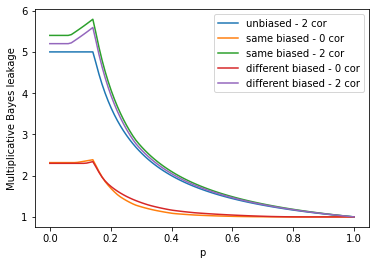

In [12]:
ps = np.linspace(0, 1, 100)
plt.plot(ps, [measure.bayes_vuln.mult_leakage(get_pi(p, C_unbiased), C1_ch) for p in ps], label="unbiased - 2 cor")
plt.plot(ps, [measure.bayes_vuln.mult_leakage(get_pi(p, C_same_biased), C2_ch) for p in ps], label="same biased - 0 cor")
plt.plot(ps, [measure.bayes_vuln.mult_leakage(get_pi(p, C_same_biased), C3_ch) for p in ps], label="same biased - 2 cor")
plt.plot(ps, [measure.bayes_vuln.mult_leakage(get_pi(p, C_different_biased), C4_ch) for p in ps], label="different biased - 0 cor")
plt.plot(ps, [measure.bayes_vuln.mult_leakage(get_pi(p, C_different_biased), C5_ch) for p in ps], label="different biased - 2 cor")
plt.xlabel('p')
plt.ylabel('Multiplicative Bayes leakage')
plt.legend()

## 3.4 Προσθήκη ακμών


Είναι ασφαλές να προσθέσουμε μια ακμή στο γράφο του δικτύου; 

Για να απαντήσουμε στο παραπάνω ερώτημα πρέπει αρχικά να γίνει σύγκριση των δύο συτημάτων ως προς την χωρητικότητα τους. Αυτός ο τρόπος σύγκρισης μπορεί να μας οδηγήσει σε  συμπεράσματα, τα οποία όμως δεν είναι καθολικά γιατί εξετάζεται ένας συγκεκριμένος στόχος του αντιπάλου κάθε φορά.

Οπότε είναι προτιμότερο να εξετάσουμε αν το κανάλι $C^{n+1}$ είναι post processing του $C^{n}$ για κάποιο κανάλι $R$, ώστε τα συμπεράσματά μας να είναι καθολικά -  για οποιονδήποτε αντίπαλο και οποιαδήποτε αρχική κατανομή.

Για να εξετάσουμε αν είναι ασφαλές να προσθέσουμε μια ακμή στο γράφο του δικτύου, θα λάβουμε υπόψιν τις ακόλουθες περιπτώσεις:

* D1: 0 corrupted χρήστες, δίκαια νομίσματα
* D2: 2 corrupted χρήστης, δίκαια νομίσματα
* D3: 0 corrupted χρήστες, μη δίκαια νομίσματα όλα ίδια 

Και για τις τρεις περιπτώσεις θα χρησιμοποιήσουμε έναν  γράφο που αποτελείται από 8 κόμβους. Μελετώνται τα τρία τελευταία κανάλια (με 7, 8, 9 ακμές αντίστοιχα), όπως αυτά δημιουργούνται κατά την εφαρμογή του αναδρομικού τύπου.

Ο τελικός γράφος με τις 9 ακμές είναι:

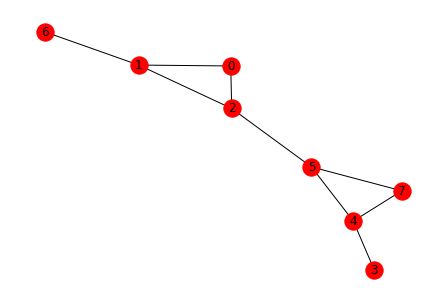

In [13]:
D_unbiased = np.array([[-1,0.5,0.5,-1,-1,-1,-1,-1],[0.5,-1,0.5,-1,-1,-1,0.5,-1],[0.5,0.5,-1,-1,-1,0.5,-1,-1],[-1,-1,-1,-1,0.5,-1,-1,-1],[-1,-1,-1,0.5,-1,0.5,-1,0.5],[-1,-1,0.5,-1,0.5,-1,-1,0.5],[-1,0.5,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,0.5,0.5,-1,-1]])
D_same_biased = np.array([[-1,0.7,0.7,-1,-1,-1,-1,-1],[0.7,-1,0.7,-1,-1,-1,0.7,-1],[0.7,0.7,-1,-1,-1,0.7,-1,-1],[-1,-1,-1,-1,0.7,-1,-1,-1],[-1,-1,-1,0.7,-1,0.7,-1,0.7],[-1,-1,0.7,-1,0.7,-1,-1,0.7],[-1,0.7,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,0.7,0.7,-1,-1]])
D_different_biased = np.array([[-1,0.3,0.4,-1,-1,-1,-1,-1],[0.3,-1,0.7,-1,-1,-1,0.8,-1],[0.4,0.7,-1,-1,-1,0.2,-1,-1],[-1,-1,-1,-1,0.9,-1,-1,-1],[-1,-1,-1,0.9,-1,0.1,-1,0.5],[-1,-1,0.2,-1,0.1,-1,-1,0.3],[-1,0.8,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,0.5,0.3,-1,-1]])
show_graph_with_labels(D_unbiased)

**Περίπτωση 1**  *(0 corrupted χρήστες, δίκαια νομίσματα)*

In [14]:
D1_ch_pre_prefinal = np.array([[0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625]])
D1_ch_prefinal = np.array([[0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125]])
D1_ch_final = np.array([[0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125]])

print("Is D1_ch_prefinal refined by D1_ch_final?", refinement.refined_by(D1_ch_prefinal, D1_ch_final))
print("Is D1_ch_pre_prefinal refined by D1_ch_prefinal?", refinement.refined_by(D1_ch_pre_prefinal, D1_ch_prefinal))
factor(D1_ch_prefinal, D1_ch_final)

Is D1_ch_prefinal refined by D1_ch_final? True
Is D1_ch_pre_prefinal refined by D1_ch_prefinal? True
Is CR == C_new?  True


**Περίπτωση 2** *(2 corrupted χρήστες, δίκαια νομίσματα)*

In [15]:
D2_ch_pre_prefinal = np.array([[0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125]])
D2_ch_prefinal = np.array([[0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0], [0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0], [0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0], [0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
D2_ch_final = np.array([[0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0], [0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0], [0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0], [0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125], [0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125], [0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125]])

print("Is D2_ch_prefinal refined by D2_ch_final?", refinement.refined_by(D2_ch_prefinal, D2_ch_final))
print("Is D2_ch_pre_prefinal refined by D2_ch_prefinal?", refinement.refined_by(D2_ch_pre_prefinal, D2_ch_prefinal))
factor(D2_ch_prefinal, D2_ch_final)

Is D2_ch_prefinal refined by D2_ch_final? True
Is D2_ch_pre_prefinal refined by D2_ch_prefinal? True
Is CR == C_new?  True


**Περίπτωση 3** *(0 corrupted χρήστες, μη δίκαια νομίσματα όλα ίδια)*

In [ ]:
D3_ch_pre_prefinal = np.array([[0.08883699999999997, 0.05042099999999999, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.0, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.0, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.0, 0.038072999999999996, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.0, 0.021609, 0.006993000000000001, 0.0, 0.016316999999999998, 0.0, 0.0, 0.009261000000000002, 0.016316999999999998, 0.0, 0.006993000000000001, 0.0, 0.0, 0.016317, 0.0, 0.0, 0.0, 0.016316999999999998, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.05042099999999999, 0.08883699999999997, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.0, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.0, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.0, 0.038072999999999996, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.0, 0.021609, 0.006993000000000001, 0.0, 0.016316999999999998, 0.0, 0.0, 0.009261000000000002, 0.016316999999999998, 0.0, 0.006993000000000001, 0.0, 0.0, 0.016317, 0.0, 0.0, 0.0, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.016316999999999998, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.05042099999999999, 0.05042099999999999, 0.08883699999999997, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.0, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.0, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.0, 0.021609, 0.006993000000000001, 0.0, 0.016316999999999998, 0.0, 0.0, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.0, 0.038072999999999996, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.016316999999999998, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.016316999999999998, 0.0, 0.006993000000000001, 0.0, 0.0, 0.016317, 0.0, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.003969000000000002, 0.003969000000000002, 0.006993000000000001, 0.08883699999999997, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.0, 0.003969000000000002, 0.05042099999999999, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.05042099999999999, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.05042099999999999, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.0, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.0, 0.009261000000000002, 0.016316999999999998, 0.0, 0.006993000000000001, 0.0, 0.0, 0.016317, 0.038072999999999996, 0.021609, 0.0, 0.016316999999999998, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.038072999999999996, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.021609, 0.006993000000000001, 0.0, 0.016316999999999998, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.0, 0.016317, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.009261000000000002, 0.009261000000000002, 0.016317, 0.038072999999999996, 0.08883699999999997, 0.038072999999999996, 0.003969000000000002, 0.0, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.021609, 0.003969000000000002, 0.0, 0.021609, 0.05042099999999999, 0.021609, 0.003969000000000002, 0.0, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.0, 0.021609, 0.021609, 0.0, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.05042099999999999, 0.021609, 0.006993000000000001, 0.0, 0.003969000000000002, 0.009261000000000002, 0.016316999999999998, 0.0, 0.021609, 0.038072999999999996, 0.0, 0.016317, 0.0, 0.0, 0.006993000000000001, 0.016316999999999998, 0.009261000000000002, 0.0, 0.038072999999999996, 0.021609, 0.0, 0.009261000000000002, 0.0, 0.0, 0.016317, 0.0017010000000000011, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.0, 0.021609, 0.021609, 0.0, 0.009261000000000002, 0.0, 0.0, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.002997000000000001, 0.0, 0.006993000000000001, 0.0, 0.0, 0.016316999999999998, 0.0, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.021609, 0.021609, 0.038072999999999996, 0.016317, 0.038072999999999996, 0.08883699999999997, 0.009261000000000002, 0.0, 0.021609, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.009261000000000002, 0.0, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.009261000000000002, 0.0, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.021609, 0.0, 0.0, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.016316999999999998, 0.0, 0.009261000000000002, 0.003969000000000002, 0.006993000000000001, 0.0, 0.009261000000000002, 0.016317, 0.0, 0.038072999999999996, 0.0, 0.0, 0.016316999999999998, 0.006993000000000001, 0.003969000000000002, 0.0, 0.016317, 0.009261000000000002, 0.0, 0.021609, 0.0, 0.0, 0.038072999999999996, 0.003969000000000002, 0.0, 0.0017010000000000011, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.021609, 0.0, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.0017010000000000011, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.0017010000000000011, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.021609, 0.006993000000000001, 0.0, 0.002997000000000001, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.0, 0.016316999999999998, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.021609, 0.038072999999999996, 0.021609, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.08883699999999997, 0.0, 0.021609, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.05042099999999999, 0.0, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.05042099999999999, 0.0, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.021609, 0.0, 0.0, 0.002997000000000001, 0.006993000000000001, 0.016316999999999998, 0.05042099999999999, 0.0, 0.016316999999999998, 0.006993000000000001, 0.003969000000000002, 0.0, 0.016317, 0.009261000000000002, 0.0, 0.021609, 0.0, 0.0, 0.009261000000000002, 0.003969000000000002, 0.006993000000000001, 0.0, 0.009261000000000002, 0.016317, 0.0, 0.038072999999999996, 0.0, 0.0, 0.003969000000000002, 0.038072999999999996, 0.0, 0.016317, 0.0, 0.0, 0.038072999999999996, 0.0, 0.0, 0.0, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.021609, 0.0, 0.0, 0.003969000000000002, 0.021609, 0.0, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.0, 0.0, 0.0, 0.003969000000000002, 0.021609, 0.0, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.006993000000000001, 0.021609, 0.0, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.016316999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08883699999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05042099999999999, 0.0, 0.0, 0.0, 0.0, 0.05042099999999999, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.021609, 0.021609, 0.0, 0.0, 0.0, 0.0, 0.05042099999999999, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.021609, 0.038072999999999996, 0.0, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.016317, 0.0, 0.038072999999999996, 0.021609, 0.0, 0.0, 0.038072999999999996, 0.0, 0.016317, 0.0017010000000000011, 0.0, 0.038072999999999996, 0.003969000000000002, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.021609, 0.021609, 0.0, 0.0, 0.021609, 0.0, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.0, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.0, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.0, 0.009261000000000002, 0.002997000000000001, 0.0, 0.021609, 0.006993000000000001, 0.016316999999999998, 0.0, 0.009261000000000002, 0.016316999999999998, 0.006993000000000001, 0.016317, 0.0, 0.016316999999999998, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.0, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.006993000000000001]])
D3_ch_prefinal = np.array([[0.062185899999999975, 0.03529469999999999, 0.03529469999999999, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.03529469999999999, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.026651099999999997, 0.002778300000000001, 0.0048951, 0.0114219, 0.026651099999999997, 0.015126299999999999, 0.004895100000000001, 0.026651099999999997, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.011421899999999999, 0.0011907000000000007, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.004895100000000001, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.002778300000000001, 0.0027783000000000013, 0.004895100000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.0011907000000000007, 0.0048951, 0.002778300000000001, 0.0008991000000000004, 0.0020979000000000006, 0.0048951, 0.0020979000000000006, 0.0011907000000000007, 0.0011907000000000007], [0.03529469999999999, 0.062185899999999975, 0.03529469999999999, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.026651099999999997, 0.002778300000000001, 0.03529469999999999, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0048951, 0.0114219, 0.026651099999999997, 0.015126299999999999, 0.004895100000000001, 0.026651099999999997, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.015126299999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.011421899999999999, 0.0011907000000000007, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.004895100000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.002778300000000001, 0.0027783000000000013, 0.004895100000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.0048951, 0.002778300000000001, 0.0008991000000000004, 0.0020979000000000006, 0.0048951, 0.0020979000000000006, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.0011907000000000007, 0.0011907000000000007, 0.0011907000000000007], [0.03529469999999999, 0.03529469999999999, 0.062185899999999975, 0.0048951, 0.0114219, 0.026651099999999997, 0.015126299999999999, 0.004895100000000001, 0.03529469999999999, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.026651099999999997, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.026651099999999997, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.011421899999999999, 0.0011907000000000007, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.004895100000000001, 0.0048951, 0.002778300000000001, 0.0008991000000000004, 0.0020979000000000006, 0.0048951, 0.0027783000000000013, 0.004895100000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.0011907000000000007, 0.0011907000000000007, 0.0020979000000000006], [0.0027783000000000013, 0.0027783000000000013, 0.0048951, 0.062185899999999975, 0.026651099999999997, 0.0114219, 0.0011907000000000007, 0.0114219, 0.0027783000000000013, 0.03529469999999999, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.03529469999999999, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.03529469999999999, 0.015126299999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.026651099999999997, 0.002778300000000001, 0.006482700000000001, 0.011421899999999999, 0.0011907000000000007, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.026651099999999997, 0.015126299999999999, 0.004895100000000001, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.0027783000000000013, 0.004895100000000001, 0.0005103000000000004, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.0011907000000000007, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.002778300000000001, 0.0008991000000000004, 0.0020979000000000006, 0.0114219, 0.006482700000000001, 0.0114219, 0.004895100000000001, 0.0020979000000000006, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.002778300000000001, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.0048951], [0.006482700000000001, 0.006482700000000001, 0.0114219, 0.026651099999999997, 0.062185899999999975, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.006482700000000001, 0.015126299999999999, 0.03529469999999999, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.015126299999999999, 0.03529469999999999, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.03529469999999999, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.0011907000000000007, 0.015126299999999999, 0.026651099999999997, 0.002778300000000001, 0.0114219, 0.006482700000000001, 0.0114219, 0.0048951, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.026651099999999997, 0.015126299999999999, 0.004895100000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.0114219, 0.0027783000000000013, 0.004895100000000001, 0.0005103000000000004, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.0048951, 0.002778300000000001, 0.0008991000000000004, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.0048951, 0.002778300000000001, 0.0048951, 0.0020979000000000006, 0.004895100000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.0011907000000000007, 0.002778300000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.0011907000000000007, 0.002778300000000001, 0.0011907000000000007, 0.0011907000000000007, 0.0020979000000000006], [0.015126299999999999, 0.015126299999999999, 0.026651099999999997, 0.0114219, 0.026651099999999997, 0.062185899999999975, 0.006482700000000001, 0.0114219, 0.015126299999999999, 0.006482700000000001, 0.015126299999999999, 0.03529469999999999, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.03529469999999999, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.015126299999999999, 0.03529469999999999, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.026651099999999997, 0.002778300000000001, 0.004895100000000001, 0.011421899999999999, 0.0048951, 0.0027783000000000013, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.015126299999999999, 0.004895100000000001, 0.002778300000000001, 0.026651099999999997, 0.0027783000000000013, 0.004895100000000001, 0.0011907000000000007, 0.0114219, 0.0011907000000000007, 0.0027783000000000013, 0.026651099999999997, 0.002778300000000001, 0.0011907000000000007, 0.006482700000000001, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.002778300000000001, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.015126299999999999, 0.002778300000000001, 0.0011907000000000007, 0.015126299999999999, 0.0027783000000000013, 0.002778300000000001, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.015126299999999999, 0.002778300000000001, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.002778300000000001, 0.0020979000000000006, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.015126299999999999, 0.0048951, 0.0020979000000000006, 0.011421899999999999, 0.0011907000000000007, 0.0020979000000000006, 0.0048951, 0.0114219, 0.006482700000000001, 0.0020979000000000006, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.0005103000000000004, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.0005103000000000004, 0.0005103000000000004, 0.0008991000000000004], [0.015126299999999999, 0.026651099999999997, 0.015126299999999999, 0.0011907000000000007, 0.0027783000000000013, 0.006482700000000001, 0.062185899999999975, 0.0011907000000000007, 0.015126299999999999, 0.0011907000000000007, 0.0027783000000000013, 0.006482700000000001, 0.03529469999999999, 0.0011907000000000007, 0.0011907000000000007, 0.0027783000000000013, 0.006482700000000001, 0.03529469999999999, 0.0011907000000000007, 0.006482700000000001, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.0020979000000000006, 0.0048951, 0.011421899999999999, 0.03529469999999999, 0.0020979000000000006, 0.011421899999999999, 0.0048951, 0.0027783000000000013, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.015126299999999999, 0.004895100000000001, 0.002778300000000001, 0.006482700000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.026651099999999997, 0.002778300000000001, 0.004895100000000001, 0.0027783000000000013, 0.026651099999999997, 0.0005103000000000004, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.002778300000000001, 0.026651099999999997, 0.0114219, 0.006482700000000001, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.015126299999999999, 0.0005103000000000004, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0027783000000000013, 0.015126299999999999, 0.0005103000000000004, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.0048951, 0.015126299999999999, 0.0008991000000000004, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0020979000000000006, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.011421899999999999, 0.0011907000000000007, 0.0020979000000000006, 0.0048951, 0.0114219, 0.004895100000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001], [0.002778300000000001, 0.002778300000000001, 0.004895100000000001, 0.0114219, 0.026651099999999997, 0.0114219, 0.0011907000000000007, 0.062185899999999975, 0.002778300000000001, 0.006482700000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.03529469999999999, 0.006482700000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.03529469999999999, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.015126299999999999, 0.015126299999999999, 0.006482700000000001, 0.015126299999999999, 0.006482700000000001, 0.0020979000000000006, 0.03529469999999999, 0.0011907000000000007, 0.002778300000000001, 0.0048951, 0.0027783000000000013, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.004895100000000001, 0.015126299999999999, 0.026651099999999997, 0.0020979000000000006, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.002778300000000001, 0.026651099999999997, 0.015126299999999999, 0.004895100000000001, 0.0005103000000000004, 0.026651099999999997, 0.0011907000000000007, 0.0114219, 0.0011907000000000007, 0.002778300000000001, 0.026651099999999997, 0.0027783000000000013, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.0005103000000000004, 0.015126299999999999, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.006482700000000001, 0.002778300000000001, 0.0005103000000000004, 0.015126299999999999, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.0027783000000000013, 0.006482700000000001, 0.002778300000000001, 0.0008991000000000004, 0.015126299999999999, 0.0020979000000000006, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.015126299999999999, 0.0048951, 0.011421899999999999, 0.0020979000000000006, 0.006482700000000001, 0.011421899999999999, 0.0048951, 0.0114219, 0.0011907000000000007, 0.011421899999999999, 0.006482700000000001, 0.0027783000000000013, 0.006482700000000001, 0.0027783000000000013, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.0027783000000000013, 0.006482700000000001, 0.0027783000000000013, 0.0027783000000000013, 0.0048951]])
D3_ch_final = np.array([[0.04695669999999998, 0.026651099999999994, 0.026651099999999994, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.026651099999999994, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.020124299999999994, 0.006482700000000001, 0.0048951, 0.0114219, 0.020124299999999994, 0.011421899999999999, 0.0114219, 0.020124299999999994, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.0048951, 0.026651099999999997, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.008624699999999999, 0.015126299999999999, 0.004895100000000001, 0.0048951, 0.008624699999999999, 0.002778300000000001, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.0114219, 0.008624699999999999, 0.0048951, 0.004895100000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.006482700000000001, 0.002097900000000001, 0.0114219, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.0036963, 0.006482700000000001, 0.0020979000000000006, 0.0020979000000000006, 0.0048951, 0.004895100000000001, 0.002778300000000001, 0.002778300000000001], [0.026651099999999994, 0.04695669999999998, 0.026651099999999994, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.020124299999999994, 0.006482700000000001, 0.026651099999999994, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.0048951, 0.0114219, 0.020124299999999994, 0.011421899999999999, 0.0114219, 0.020124299999999994, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.0048951, 0.026651099999999997, 0.002778300000000001, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.008624699999999999, 0.015126299999999999, 0.004895100000000001, 0.0048951, 0.008624699999999999, 0.002778300000000001, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.0114219, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.008624699999999999, 0.0048951, 0.004895100000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.006482700000000001, 0.002097900000000001, 0.0114219, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.0036963, 0.006482700000000001, 0.0020979000000000006, 0.0020979000000000006, 0.0048951, 0.004895100000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001], [0.026651099999999994, 0.026651099999999994, 0.04695669999999998, 0.0048951, 0.0114219, 0.020124299999999994, 0.011421899999999999, 0.0114219, 0.026651099999999994, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.020124299999999994, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.008624699999999999, 0.015126299999999999, 0.004895100000000001, 0.020124299999999994, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.0048951, 0.026651099999999997, 0.002778300000000001, 0.008624699999999999, 0.0048951, 0.004895100000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.0048951, 0.008624699999999999, 0.002778300000000001, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.0114219, 0.0036963, 0.006482700000000001, 0.0020979000000000006, 0.0020979000000000006, 0.0048951, 0.002097900000000001, 0.0114219, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.004895100000000001], [0.0027783000000000013, 0.0027783000000000013, 0.0048951, 0.04695669999999998, 0.020124299999999994, 0.0114219, 0.0011907000000000007, 0.0114219, 0.0027783000000000013, 0.026651099999999994, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.026651099999999994, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.026651099999999994, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.020124299999999994, 0.006482700000000001, 0.0048951, 0.008624699999999999, 0.002778300000000001, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.020124299999999994, 0.011421899999999999, 0.0114219, 0.008624699999999999, 0.0048951, 0.004895100000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.0048951, 0.026651099999999997, 0.002778300000000001, 0.002097900000000001, 0.0114219, 0.0011907000000000007, 0.0011907000000000007, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.008624699999999999, 0.015126299999999999, 0.004895100000000001, 0.0036963, 0.006482700000000001, 0.0020979000000000006, 0.0020979000000000006, 0.0114219, 0.006482700000000001, 0.0114219, 0.0114219, 0.004895100000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.0048951], [0.006482700000000001, 0.006482700000000001, 0.0114219, 0.020124299999999994, 0.04695669999999998, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.006482700000000001, 0.011421899999999999, 0.026651099999999994, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.011421899999999999, 0.026651099999999994, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0027783000000000013, 0.0048951, 0.0048951, 0.002778300000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.026651099999999994, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.0027783000000000013, 0.0048951, 0.008624699999999999, 0.002778300000000001, 0.011421899999999999, 0.020124299999999994, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.0114219, 0.0048951, 0.008624699999999999, 0.0048951, 0.004895100000000001, 0.020124299999999994, 0.011421899999999999, 0.0114219, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.0114219, 0.002097900000000001, 0.0114219, 0.0011907000000000007, 0.0048951, 0.026651099999999997, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.0048951, 0.0048951, 0.002778300000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.0036963, 0.006482700000000001, 0.0020979000000000006, 0.008624699999999999, 0.015126299999999999, 0.004895100000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0048951, 0.004895100000000001, 0.0114219, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.0020979000000000006], [0.011421899999999999, 0.011421899999999999, 0.020124299999999994, 0.0114219, 0.026651099999999997, 0.04695669999999998, 0.0048951, 0.026651099999999997, 0.011421899999999999, 0.006482700000000001, 0.015126299999999999, 0.026651099999999994, 0.0048951, 0.015126299999999999, 0.006482700000000001, 0.015126299999999999, 0.026651099999999994, 0.0048951, 0.015126299999999999, 0.0048951, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.026651099999999994, 0.008624699999999999, 0.015126299999999999, 0.0048951, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.020124299999999994, 0.006482700000000001, 0.0114219, 0.008624699999999999, 0.0048951, 0.0027783000000000013, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.011421899999999999, 0.0114219, 0.006482700000000001, 0.020124299999999994, 0.002097900000000001, 0.0114219, 0.0011907000000000007, 0.0114219, 0.0011907000000000007, 0.0027783000000000013, 0.026651099999999997, 0.002778300000000001, 0.002778300000000001, 0.0048951, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.011421899999999999, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.0048951, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.011421899999999999, 0.0036963, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.015126299999999999, 0.0048951, 0.004895100000000001, 0.008624699999999999, 0.002778300000000001, 0.004895100000000001, 0.0048951, 0.0114219, 0.0048951, 0.004895100000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.0011907000000000007, 0.0048951, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.0020979000000000006], [0.011421899999999999, 0.020124299999999994, 0.011421899999999999, 0.0011907000000000007, 0.0027783000000000013, 0.0048951, 0.04695669999999998, 0.002778300000000001, 0.011421899999999999, 0.0011907000000000007, 0.0027783000000000013, 0.0048951, 0.026651099999999994, 0.002778300000000001, 0.0011907000000000007, 0.0027783000000000013, 0.0048951, 0.026651099999999994, 0.002778300000000001, 0.0048951, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.008624699999999999, 0.026651099999999994, 0.004895100000000001, 0.008624699999999999, 0.0048951, 0.0027783000000000013, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.011421899999999999, 0.0114219, 0.006482700000000001, 0.0048951, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.020124299999999994, 0.006482700000000001, 0.0114219, 0.002097900000000001, 0.020124299999999994, 0.0011907000000000007, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.002778300000000001, 0.026651099999999997, 0.026651099999999997, 0.0048951, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.002097900000000001, 0.011421899999999999, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.015126299999999999, 0.002097900000000001, 0.011421899999999999, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.015126299999999999, 0.0048951, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.0036963, 0.011421899999999999, 0.0020979000000000006, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.015126299999999999, 0.0048951, 0.004895100000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.008624699999999999, 0.002778300000000001, 0.004895100000000001, 0.0048951, 0.0114219, 0.0114219, 0.0048951, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001], [0.006482700000000001, 0.006482700000000001, 0.0114219, 0.0114219, 0.026651099999999997, 0.026651099999999997, 0.002778300000000001, 0.04695669999999998, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.026651099999999994, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.026651099999999994, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.004895100000000001, 0.026651099999999994, 0.002778300000000001, 0.002778300000000001, 0.0048951, 0.0027783000000000013, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.0114219, 0.011421899999999999, 0.020124299999999994, 0.004895100000000001, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.020124299999999994, 0.011421899999999999, 0.0114219, 0.0011907000000000007, 0.020124299999999994, 0.0011907000000000007, 0.0114219, 0.0011907000000000007, 0.002778300000000001, 0.026651099999999997, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.011421899999999999, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.0048951, 0.006482700000000001, 0.0011907000000000007, 0.011421899999999999, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.0048951, 0.0048951, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.0020979000000000006, 0.011421899999999999, 0.0020979000000000006, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.015126299999999999, 0.0048951, 0.008624699999999999, 0.004895100000000001, 0.0048951, 0.008624699999999999, 0.0048951, 0.0114219, 0.002778300000000001, 0.008624699999999999, 0.0048951, 0.0027783000000000013, 0.006482700000000001, 0.002097900000000001, 0.002778300000000001, 0.0048951, 0.0048951, 0.0027783000000000013, 0.006482700000000001, 0.002097900000000001, 0.002097900000000001, 0.0036963]])

print("Is D3_ch_prefinal refined by D3_ch_final?", refinement.refined_by(D3_ch_prefinal, D3_ch_final))
print("Is D3_ch_pre_prefinal refined by D3_ch_prefinal?", refinement.refined_by(D3_ch_pre_prefinal, D3_ch_prefinal))
factor(D3_ch_prefinal, D3_ch_final)

Και στις τρεις περιπτώσεις χρησιμοποιούμε τη μέθοδο refined_by δύο φορές. Την πρώτη για να ελέγξουμε αν το κανάλι με 8 ακμές είναι πιο ασφαλές από αυτό με τις 7, και τη δεύτερη για να ελέγξουμε αν το τελικό κανάλι με τις 9 ακμές είναι πιο ασφαλές από αυτό με τις 8. Και στους δύο ελέγχους το αποτέλεσμα είναι true, που σημαίνει ότι όταν σε έναν γράφο προστίθενται ακμές, το σύστημα είναι πιθανόν να είναι ασφαλέστερο. Σίγουρα όμως παραμένει 
τουλάχιστον τόσο ασφαλές όσο ήταν και το προηγούμενο. Τέλος, εξετάζεται αν το κανάλι $C^{n+1}$ είναι post processing του $C^{n}$ για κάποιο κανάλι $R$. Το αποτέλεσμα είναι θετικό!
